# Task4 - To Explore Decision Tree Algorithm
For the given ‘Iris’ dataset, I am suposed create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly


In [1]:
#importing the necessary datasets
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#importing the data
iris = pd.read_csv("Iris.csv")
#viewing a sample of our data
iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
5,6,5.4,3.9,1.7,0.4,Iris-setosa
109,110,7.2,3.6,6.1,2.5,Iris-virginica
81,82,5.5,2.4,3.7,1.0,Iris-versicolor
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
41,42,4.5,2.3,1.3,0.3,Iris-setosa
15,16,5.7,4.4,1.5,0.4,Iris-setosa
63,64,6.1,2.9,4.7,1.4,Iris-versicolor
140,141,6.7,3.1,5.6,2.4,Iris-virginica
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
39,40,5.1,3.4,1.5,0.2,Iris-setosa


 so according to what i can observe from our dataset is that we have our target variable which is -Species column and the features include the rest of the columns

In [3]:
#lets observe our data look whether there are any missing values
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

thats great as we can see we have no missing values and so we can move on

In [4]:
#overview of our data
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


From what we can observe above we can see that the largest SepalLengthCm = 7.9, SepalWidthCm=4.4,  PetalLengthCm = 6.9,  PetalWidthCm= 2.5 and their correspondent minimum values together , it gives the summary arithmetic values

okay now we need to remove the colums that are less usefull to our model such as id, since it cannot be used as a feature

In [5]:
# a little cleaning to our data
iris = iris.drop("Id",axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Now if we want our model to generalize well on unseen data we need to split our data into training and testing sets where we will train our model on the training set and later we will evaluate our model on data it hasnt seen which is our test set , and since decision trees are prone to overfitting we are gonna watchout for that too

Lets now assign our features to X and our target variable to y

In [6]:
#look at the columns
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
#features
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
#target variable
y = iris['Species']

In [8]:
print(f"the shape of our features variables is {X.shape}")
print(f"the shape of our features variables is {y.shape}")

the shape of our features variables is (150, 4)
the shape of our features variables is (150,)


In [9]:
#importing or model
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=10)


In [10]:
#we must ensure that the training set and test set are equal
print(f"the shape of the training set is {X_train.shape} and {y_train.shape}")

print(f"the shape of the test set is {X_test.shape} and {y_test.shape}")

the shape of the training set is (112, 4) and (112,)
the shape of the test set is (38, 4) and (38,)


everything seems okay so we can go ahead and import our Machine Learning algorithm and today we are going to use Decision Tree classifier

In [11]:
#Importing our model
from sklearn.tree import DecisionTreeClassifier
#assigning our tree to a variable
tree = DecisionTreeClassifier(max_depth=2)


In order for our tree not to overfit the data by memprising every target variable we need to limit the depth of the tree

In [12]:
#lets train our model
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [13]:
tree.score(X_train,y_train)

0.9553571428571429

In [14]:
tree.score(X_test,y_test)


0.9736842105263158

 So as we have seen above our model actually performed better on the unseen data than the training data, this way we are sure that the model has not eoverfit the data and also at tghe same time it didnt underfit the data, our model achieved an accuracy pf 97% accuracy which means that when it predicts it is 97 % sure to be correct

# visualising the decision Tree

In [15]:
# Install required libraries
!pip install pydotplus

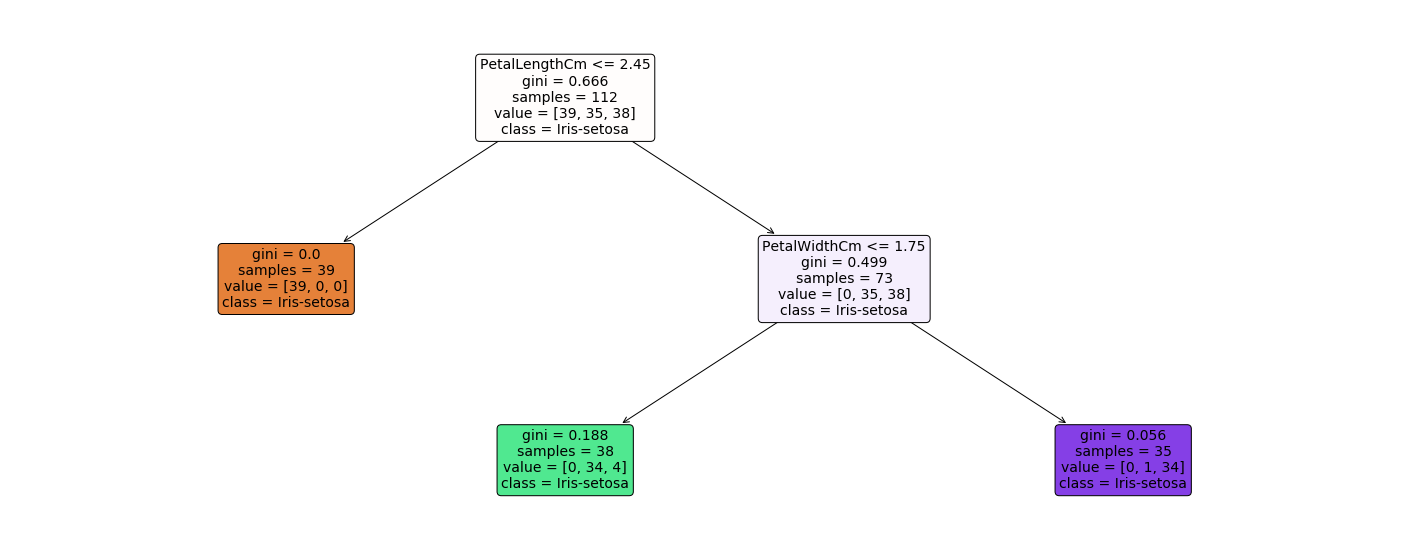

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
a = plot_tree(tree, 
              feature_names=iris.columns, 
              class_names= iris.Species, 
              filled=True, 
              rounded=True, 
              fontsize=14)